In [7]:
from google.colab import drive
drive.mount('/content/drive')

In [10]:
with open('/content/drive/MyDrive/demo.txt', 'wt') as f:
    f.write("This file is generated from google colab")

# Dataset

In [43]:
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader


class HeartDiceasesDataset(Dataset):
    def __init__(self, file_path: str):
        self.file_path = file_path

        df = pd.read_csv(file_path)
        self.X = torch.tensor(df.drop(columns=['target']).values, dtype=torch.float32)
        self.y = torch.tensor(df['target'].values, dtype=torch.long)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

    def __len__(self):
        return self.X.shape[0]

ds = HeartDiceasesDataset('heart_diceases.csv')

In [32]:
# x, y = ds.X[0], ds.y[0]
x, y = ds[0]

In [39]:
len(ds)

1025

In [58]:
dl = DataLoader(ds, batch_size=32, shuffle=True, drop_last=True)

In [59]:
for x, y in dl:
    print(x.shape, y.shape)

torch.Size([32, 13]) torch.Size([32])
torch.Size([32, 13]) torch.Size([32])
torch.Size([32, 13]) torch.Size([32])
torch.Size([32, 13]) torch.Size([32])
torch.Size([32, 13]) torch.Size([32])
torch.Size([32, 13]) torch.Size([32])
torch.Size([32, 13]) torch.Size([32])
torch.Size([32, 13]) torch.Size([32])
torch.Size([32, 13]) torch.Size([32])
torch.Size([32, 13]) torch.Size([32])
torch.Size([32, 13]) torch.Size([32])
torch.Size([32, 13]) torch.Size([32])
torch.Size([32, 13]) torch.Size([32])
torch.Size([32, 13]) torch.Size([32])
torch.Size([32, 13]) torch.Size([32])
torch.Size([32, 13]) torch.Size([32])
torch.Size([32, 13]) torch.Size([32])
torch.Size([32, 13]) torch.Size([32])
torch.Size([32, 13]) torch.Size([32])
torch.Size([32, 13]) torch.Size([32])
torch.Size([32, 13]) torch.Size([32])
torch.Size([32, 13]) torch.Size([32])
torch.Size([32, 13]) torch.Size([32])
torch.Size([32, 13]) torch.Size([32])
torch.Size([32, 13]) torch.Size([32])
torch.Size([32, 13]) torch.Size([32])
torch.Size([

In [98]:
from torch.utils.data import Dataset, DataLoader
import scipy.io


class Flowers(Dataset):
    def __init__(self, img_path, label_path, setid_path, split = 'train'):
        self.img_path = img_path
        self.label_path = label_path
        self.setid_path = setid_path
        self.split = split

        labels_data = scipy.io.loadmat(label_path)
        self.setid_data = scipy.io.loadmat(setid_path)

        self.labels = labels_data['labels'][0]

        if split == 'train':
            self.img_idx = self.setid_data['trnid'][0]
        elif split == 'dev':
            self.img_idx = self.setid_data['valid'][0]
        elif split == 'test':
            self.img_idx = self.setid_data['tstid'][0]
        else:
            raise ValueError("split parameter can be only one of [train, dev, test]")


    def __getitem__(self, idx):
        img_idx = self.img_idx[idx].item()
        label = self.labels[img_idx]
        img_name = os.path.join(img_path, f'image_{img_idx:05d}.jpg')
        img = Image.open(img_name)
        img_data = np.asarray(img)
        return img_data, label

    def __len__(self):
        return self.img_idx.shape[0]


flowers_ds_train = Flowers(
    img_path = '/content/drive/MyDrive/data/102flowers/jpg',
    label_path = '/content/drive/MyDrive/data/102flowers/imagelabels.mat', # Matlab file
    setid_path = '/content/drive/MyDrive/data/102flowers/setid.mat',
    split='train'
)

In [99]:
flowers_ds_train[0]

(array([[[  9,  19,   8],
         [  9,  19,   8],
         [  9,  20,   6],
         ...,
         [143, 101, 151],
         [142,  95, 147],
         [143,  95, 147]],
 
        [[ 10,  20,   9],
         [ 10,  20,   9],
         [ 10,  21,   7],
         ...,
         [143, 101, 151],
         [142,  95, 147],
         [143,  95, 147]],
 
        [[ 13,  21,  10],
         [ 13,  21,  10],
         [ 10,  21,   7],
         ...,
         [142, 100, 148],
         [143,  96, 148],
         [144,  96, 148]],
 
        ...,
 
        [[ 21,  48,  13],
         [ 23,  50,  15],
         [ 25,  52,  17],
         ...,
         [121,  96, 136],
         [118,  91, 132],
         [118,  91, 132]],
 
        [[ 22,  49,  14],
         [ 23,  50,  15],
         [ 25,  52,  17],
         ...,
         [119,  94, 134],
         [118,  91, 132],
         [118,  91, 132]],
 
        [[ 22,  49,  14],
         [ 24,  51,  16],
         [ 25,  52,  17],
         ...,
         [117,  92, 132],
  

In [83]:
import scipy.io

label_path = '/content/drive/MyDrive/data/102flowers/imagelabels.mat' # Matlab file
setid_path = '/content/drive/MyDrive/data/102flowers/setid.mat'
img_path='/content/drive/MyDrive/data/102flowers/jpg'

labels_data = scipy.io.loadmat(label_path)
setid_data = scipy.io.loadmat(setid_path)

In [96]:
labels = labels_data['labels'][0]
labels

array([77, 77, 77, ..., 62, 62, 62], dtype=uint8)

In [89]:
labels_data['labels'].shape

(1, 8189)

In [66]:
setid_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Thu Feb 19 17:38:58 2009',
 '__version__': '1.0',
 '__globals__': [],
 'trnid': array([[6765, 6755, 6768, ..., 8026, 8036, 8041]], dtype=uint16),
 'valid': array([[6773, 6767, 6739, ..., 8028, 8008, 8030]], dtype=uint16),
 'tstid': array([[6734, 6735, 6737, ..., 8044, 8045, 8047]], dtype=uint16)}

In [73]:
import os
from PIL import Image
import numpy as np

img1_path = os.path.join(img_path, 'image_00001.jpg')

img1 = Image.open(img1_path)
img1_data = np.asarray(img1)

In [77]:
train_idx = setid_data['trnid'][0]
# train_idx.sort()

In [91]:
setid_data['trnid'][0].shape[0] + setid_data['valid'][0].shape[0] + setid_data['tstid'][0].shape[0]

8189

In [92]:
setid_data['valid'][0].shape[0]

1020

In [93]:
setid_data['tstid'][0].shape[0]

6149

In [90]:
train_idx.shape

(1020,)

In [76]:
train_idx

array([  28,   36,   79, ..., 8167, 8175, 8177], dtype=uint16)

In [97]:
idx = 1
img_idx = train_idx[idx]
print(img_idx)
label = labels[img_idx]
print(label)
# img_name = os.path.join(img_path, f'image_{idx:05d}.jpg')
# img = Image.open(img_name)
# img_data = np.asarray(img)
# img_data.shape

36
77


array([[[134, 124, 148],
        [122, 113, 134],
        [114, 108, 122],
        ...,
        [ 81,  91,  66],
        [ 88, 104,  75],
        [ 99, 118,  88]],

       [[143, 131, 151],
        [146, 135, 151],
        [142, 134, 147],
        ...,
        [ 98, 108,  83],
        [ 98, 114,  85],
        [101, 120,  90]],

       [[136, 123, 133],
        [143, 130, 139],
        [146, 135, 141],
        ...,
        [100, 110,  83],
        [ 94, 109,  78],
        [ 88, 105,  73]],

       ...,

       [[ 58,  54,  53],
        [ 67,  66,  62],
        [ 63,  65,  60],
        ...,
        [230, 218, 204],
        [230, 218, 204],
        [230, 218, 206]],

       [[ 68,  64,  63],
        [ 74,  73,  69],
        [ 66,  68,  63],
        ...,
        [236, 224, 210],
        [236, 224, 210],
        [236, 224, 212]],

       [[ 62,  58,  57],
        [ 71,  70,  66],
        [ 67,  69,  64],
        ...,
        [239, 227, 213],
        [239, 227, 213],
        [239, 227, 215]]], dtype=uint8)
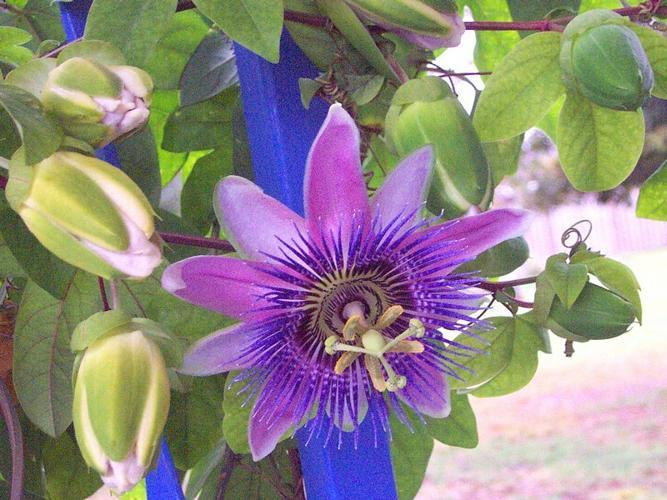